### Model Evaluation

Model evaluation is the process of choosing between models, different model types, tuning parameters, and features. Better evaluation processes lead to better, more accurate models in your applications.

In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from urllib.request import urlopen 
%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Cleaning
Go through a quick data cleaning


In [4]:
# Remove unusual rows of data
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
# Dimensions of data set after cleansing
print(diabetes_mod.shape)

(724, 9)


In [5]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [6]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

#### Model Evaluation Procedure

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy {}".format(accuracy))


Accuracy 0.7955801104972375


### K-Fold Cross Validation

This method splits the data set into K equal partitions (“folds”), then uses 1 fold as the testing set and the union of the other folds as the training set.

The process will follow the above steps K times, using different folds as the testing set each time. The average testing accuracy of the process is the testing accuracy.

**Pros** : More accurate estimate of out-of-sample accuracy. More “efficient” use of data (every observation is used for both training and testing)

**Cons** : Much slower than Train/Test split.

For cross validation, Scikit Learn provides the method cross_val_score, which is also from the model_selection module. 

In [9]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()
print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


### Model Evaluation Metrics

A module evaluation metric is a criterium by which the performance or the accuracy of a model is measured.

#### Classification Accuracy

Classification accuracy is by far the most common model evaluation metric used for classification problems. Classification accuracy is the percentage of correct predictions.

Even though classification is a good metric, when class distribution is imbalanced, it can give a false sense of high accuracy.


Scikit-learn provides a separate method to evaluate the accuracy, which is accuracy_score in the metrics module. Also the accuracy estimator is built in as a parameter in cross_val_score. The scoring parameter is what decides the classification accuracy.

The classification accuracy metric works better if there is an equal number of samples in each class.


#### Confusion Matrix
A confusion matrix can be defined loosely as a table that describes the performance of a classification model on a set of test data for which the true values are known. A confusion matrix is highly interpretative and can be used to estimate a number of other metrics.

Scikit-learn provides a method to perform the confusion matrix on the testing data set. The confusion_matrix method requires the actual response class values and the predicted values to determine the matrix.

In [10]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Text(0.5, 1, 'Confusion Matrix')

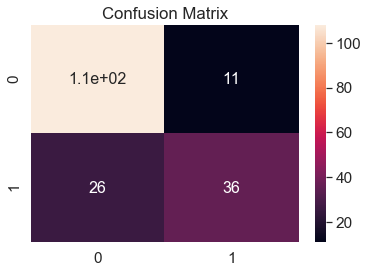

In [11]:
# plot confusion matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2),range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

In [12]:
# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]

#### Classification Accuracy


In [13]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


#### Sensitivity/Recall

In [14]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


#### Specificity

In [15]:
print(TN / float(TN + FP))

0.907563025210084


#### False Positive Rate

The false positive rate is the ratio of negative predictions that were determined to be positive to the total number of negative predictions. Or, when the actual value is negative, how often is the prediction incorrect.



In [16]:
print(FP / float(TN + FP))

0.09243697478991597


#### Precision
Precision is the ratio of correct predictions to the total no. of predicted correct predictions. This measures how precise the classifier is when predicting positive instances.

In [17]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


#### Adjusting Classification Threshold

It’s possible to adjust the logistic regression model’s classification threshold to increase the model’s sensitivity.

After training, the model exposes an attribute called predict_proba, which returns the probability of the test data being in a particular response class. From this, we’ll get the probabilities of predicting a diabetic result.

In [18]:
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Next we’ll plot the probability of becoming diabetic in a histogram.

Text(0, 0.5, 'Frequency')

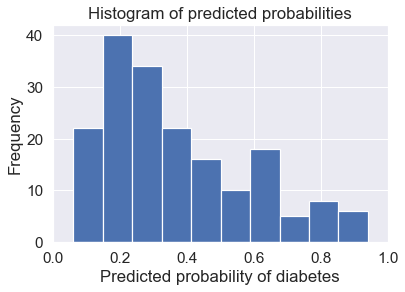

In [19]:
plt.hist(y_pred_prob, bins=10, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Since it’s a binary classification problem, the classification probability threshold is 0.5, which means if the probability is less than 0.5, it’s classified as “0 (non-diabetic)”. If the probability is more than 0.5, it’s classified as “1 (diabetic)”.

We can use the Scikit-learn’s binarize method to set the threshold to 0.3, which will classify as ‘0 (non-diabetic)’ if the probability is less than 0.3, and if it’s greater it will be classified as ‘1 (diabetic)’.

In [20]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]


Next we’ll print the confusion matrix for the new threshold predictions, and compare with the original.

In [21]:
# new confusion matrix (threshold of 0.3)
confusion_new = confusion_matrix(y_test, y_pred_class)
print(confusion_new)

[[82 37]
 [ 8 54]]


In [22]:
TP = confusion_new[1, 1]
TN = confusion_new[0, 0]
FP = confusion_new[0, 1]
FN = confusion_new[1, 0]

Next we’ll calculate sensitivity and specificity to observe the changes from the previous confusion matrix calculations.

Previously the sensitivity calculated was 0.58. We can observe that the sensitivity has increased, which means it’s more sensitive to predict “positive (diabetic)” instances.

In [23]:
# sensitivity has increased
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred_class))


0.8709677419354839
0.8709677419354839


Using the same process, we can calculate the specificity for the new confusion matrix. Previously it was 0.90. We observe that it has decreased.

In [24]:
# specificity has decreased
print(TN / float(TN + FP))

0.6890756302521008


We adjust the threshold of a classifier in order to suit the problem we’re trying to solve.

*In the case of a spam filter (positive class is spam), optimization needs to be done for precision. This means it’s more acceptable to have false negatives (spam goes to the inbox) than false positives (non-spam is caught by the spam filter).*

*In the case of a fraudulent transaction detector (positive class is “fraud”), optimization is to be done for sensitivity, which means it’s acceptable to more have false positives (normal transactions that are flagged as possible fraud) than false negatives (fraudulent transactions that are not detected).*

#### ROC curve

An ROC curve is a commonly used way to visualize the performance of a binary classifier, meaning a classifier with two possible output classes. The curve plots the True Positive Rate (Recall) against the False Positive Rate (also interpreted as 1-Specificity).

Scikit-learn provides a method called roc_curve to find the false positive and true positive rates across various thresholds, which we can use to draw the ROC curve. We can plot the curve as follows.

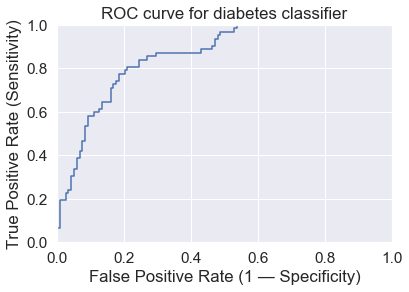

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 — Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

We’re unable to find the threshold used to generate the ROC curve on the curve itself. But we can use the following method to find the specificity and sensitivity across various thresholds.

In [26]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1-fpr[thresholds > threshold][-1])

In [27]:
evaluate_threshold(0.3)

evaluate_threshold(0.5)

Sensitivity: 0.8709677419354839
Specificity: 0.7058823529411764
Sensitivity: 0.5806451612903226
Specificity: 0.907563025210084


ROC curve is a reliable indicator in measuring the performance of a classifier. It can also be extended to classification problems with three or more classes using the “one versus all” approach

#### AUC (Area Under the Curve)
AUC or Area Under the Curve is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance.

In Scikit-learn, we can find the AUC score using the method roc_auc_score.

In [28]:
print(roc_auc_score(y_test, y_pred_prob))

0.8587693141772839


#### K-fold 
Also, the cross_val_score method, which is used to perform the K-fold cross validation method, comes with the option to pass roc_auc as the scoring parameter. Therefore, we can measure the AUC score using the cross validation procedure as well.

In [29]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8374390514184398